In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("police_department_data.csv")
df.crime_date=pd.to_datetime(df.crime_date,format="%Y-%m-%d  %H:%M:%S")
df.index=pd.DatetimeIndex(df.crime_date)

In [3]:
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
crime_date,,,,,,,,,
2016-01-29 11:00:00,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
2016-01-29 11:00:00,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2016-04-25 14:59:00,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
2016-01-05 23:50:00,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
2016-01-01 00:30:00,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [4]:
# extracting month, hour and year from date and dropping address as it is not required
df['time_hour'] = df["crime_date"].apply(lambda x:x.hour)
df['month'] = df["crime_date"].apply(lambda x:x.month)
df['year'] = df["crime_date"].apply(lambda x:x.year)
df.drop(["address"],axis=1,inplace=True)

In [5]:
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,department_id,location,time_hour,month,year
crime_date,,,,,,,,,,,
2016-01-29 11:00:00,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",12005827212120,"(37.775420706711, -122.403404791479)",11,1,2016
2016-01-29 11:00:00,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",12005827212168,"(37.775420706711, -122.403404791479)",11,1,2016
2016-04-25 14:59:00,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",14105926363010,"(37.7299809672996, -122.388856204292)",14,4,2016
2016-01-05 23:50:00,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,16001366271000,"(37.7857883766888, -122.412970537591)",23,1,2016
2016-01-01 00:30:00,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16000274071000,"(37.7650501214668, -122.419671780296)",0,1,2016


In [6]:
df.shape

(150500, 11)

In [7]:
df.isnull().sum() # no null values are there

incident_id            0
category               0
crime_description      0
crime_date             0
department_district    1
resolution             0
department_id          0
location               0
time_hour              0
month                  0
year                   0
dtype: int64

In [8]:
# grouping and sorting incident_id acc to crime_description
a=df.groupby('crime_description').agg({'incident_id':'count'}).sort_values(by='incident_id',ascending=False)
a.head(10)
# most frequent crime is "GRAND THEFT FROM LOCKED AUTO" and least frequent one's are many

,incident_id
crime_description,
GRAND THEFT FROM LOCKED AUTO,17741
LOST PROPERTY,4596
"AIDED CASE, MENTAL DISTURBED",4566
PETTY THEFT OF PROPERTY,4416
"MALICIOUS MISCHIEF, VANDALISM",4262
BATTERY,4211
PETTY THEFT FROM LOCKED AUTO,3994
STOLEN AUTOMOBILE,3603
"DRIVERS LICENSE, SUSPENDED OR REVOKED",3376


In [9]:
# checking whether there is any further description of grand theft from locked auto
df[df['crime_description']=='GRAND THEFT FROM LOCKED AUTO'].groupby('category').agg({'incident_id':'count'}).sort_values(by='incident_id',ascending=False)
# there are none
# this means that there is only one kind of crime in "GRAND THEFT FROM LOCKED AUTO" and that is larceny/theft

,incident_id
category,
LARCENY/THEFT,17741


In [10]:
# categorizing categories and extracting subcategories in crime_description
a=df.groupby(['category','crime_description']).agg({'incident_id':'count'}).groupby(['category']).head().sort_values(by=['category','incident_id'],ascending = [True,False])
a.head()

incident_id
category crime_description                          
ARSON    ARSON                                   115
         ARSON OF A VEHICLE                       78
         ARSON OF A COMMERCIAL BUILDING           21
         ARSON OF A VACANT BUILDING                4
         ARSON OF A POLICE VEHICLE                 1

In [11]:
# major crimes monthly arrest analysis
df["details"]=df["category"]+"," +df["crime_description"]
# concat and groupby
top_crimes=df.groupby(['details'])["resolution"].count()
top_crimes=pd.DataFrame(top_crimes).nlargest(10,"resolution").reset_index()
top_crimes=list(top_crimes["details"])

top_crimes

['LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO',
 'NON-CRIMINAL,LOST PROPERTY',
 'NON-CRIMINAL,AIDED CASE, MENTAL DISTURBED',
 'LARCENY/THEFT,PETTY THEFT OF PROPERTY',
 'VANDALISM,MALICIOUS MISCHIEF, VANDALISM',
 'ASSAULT,BATTERY',
 'LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO',
 'VEHICLE THEFT,STOLEN AUTOMOBILE',
 'OTHER OFFENSES,DRIVERS LICENSE, SUSPENDED OR REVOKED',
 'WARRANTS,WARRANT ARREST']

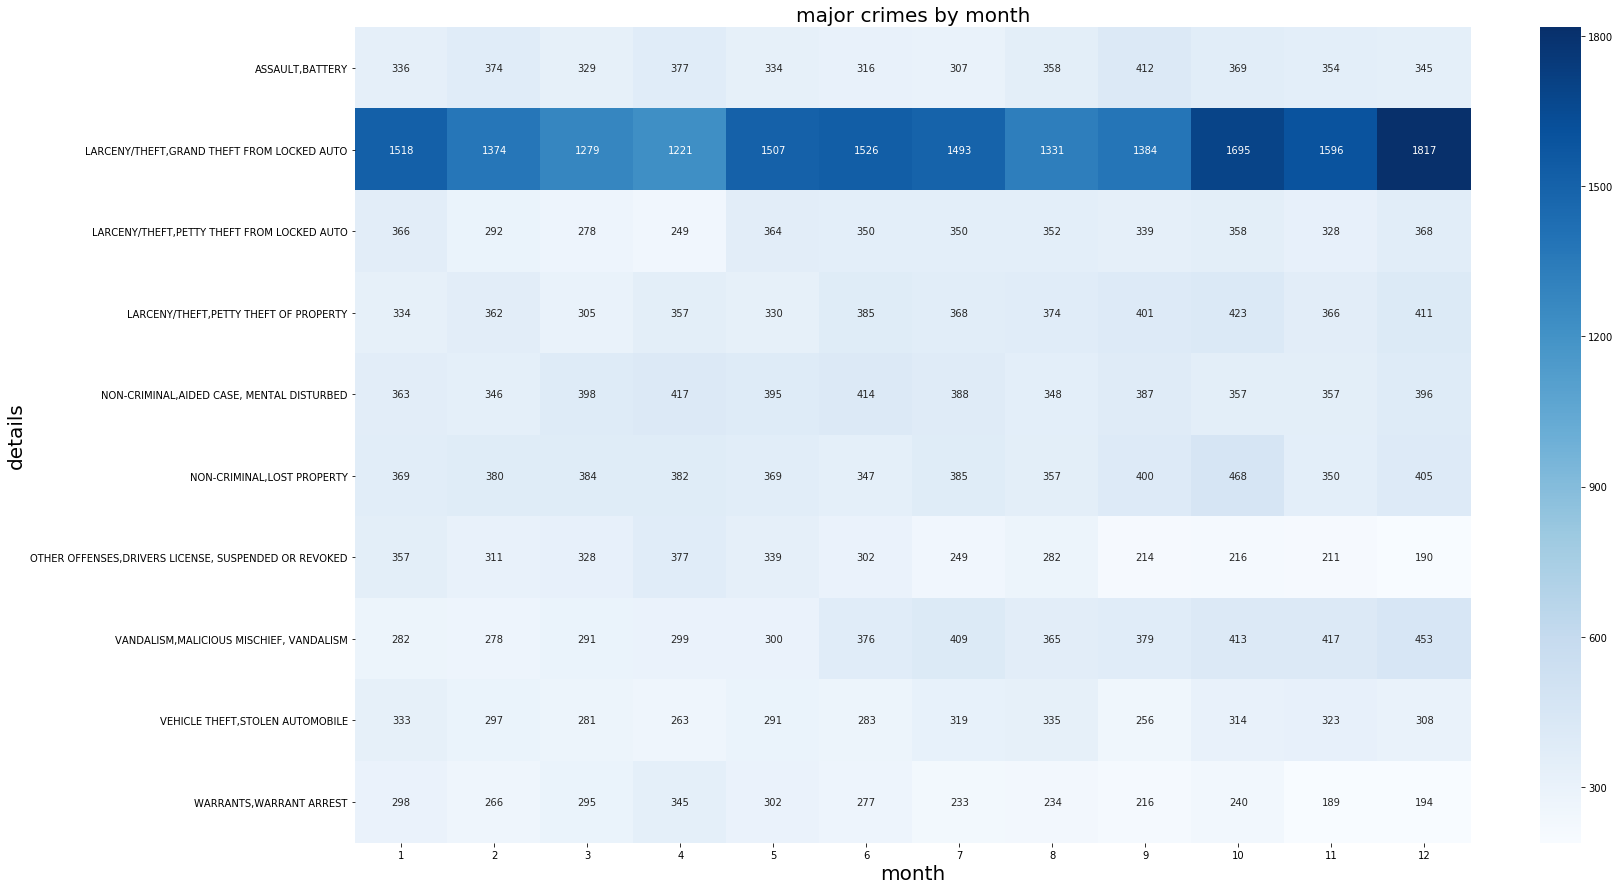

In [12]:
df2=df.groupby(["details","month"])["resolution"].count()

# chart formatting
DIMS=(25,15)
fig=plt.figure(figsize=DIMS)
ax1=fig.add_subplot(111)
ax1.set_title("major crimes by month",fontsize=20)
ax1.set_xlabel("month",fontsize=20)
ax1.set_ylabel("details",fontsize=20)

# getting top 20 data
df2=pd.DataFrame(df2).reset_index()
df2=df2[df2["details"].isin(top_crimes)]

# pivot data to 2d table and fill all nan values
df2=df2.pivot_table(index="details",columns="month",values="resolution")
df2.fillna(0,inplace=True)

# heatmap
sns.heatmap(df2,cmap="Blues",annot=True,fmt='g')

In [13]:
# lets see the most occuring crime using wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

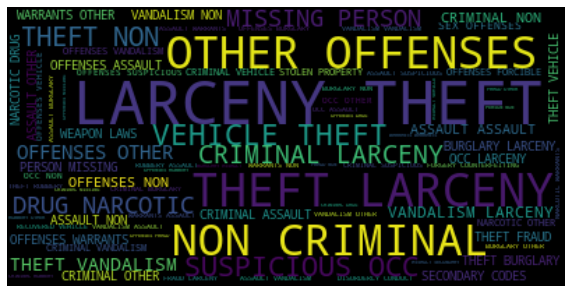

In [14]:
crime_types=" ".join(crime for crime in df["category"])

crime_types_wordcloud=WordCloud().generate(crime_types)

# plot wordcloud image
plt.figure(figsize=[10,10])
plt.imshow(crime_types_wordcloud,interpolation="bilinear")
plt.axis("off")

plt.show()

In [15]:
# shows that larceny and theft are the most frequently occurring crimes
df["category"].value_counts().head() # hence cross verified also

LARCENY/THEFT     40409
OTHER OFFENSES    19599
NON-CRIMINAL      17866
ASSAULT           13577
VANDALISM          8589
Name: category, dtype: int64

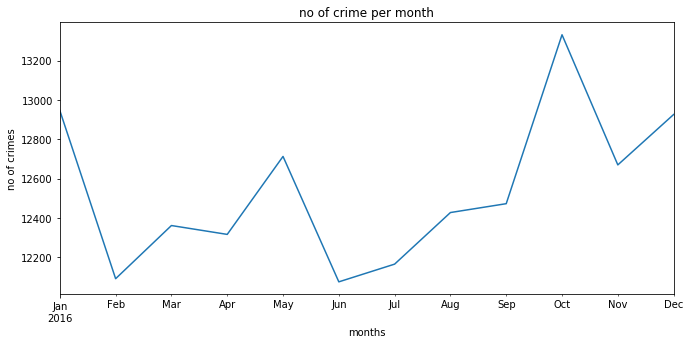

In [16]:
# yearly crime trend analysis based on months
plt.figure(figsize=(11,5))

df.resample("M").size().plot(legend=False)
plt.title("no of crime per month")
plt.xlabel("months")
plt.ylabel("no of crimes")
plt.show()

### clearly shows that may and october is the peak of crimes and february and june is dip

In [17]:
# frequency trends for each crime
crimes_count_date=df.pivot_table("incident_id",aggfunc=np.size,
                                 columns="category",index=df.index.date)

crimes_count_date.index=pd.DatetimeIndex(crimes_count_date.index)

crimes_count_date
# creatig pivot table of categories 
crimes_count_date.fillna(0,inplace=True)

crimes_count_date.head()

category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
2016-01-01,1.0,61.0,0.0,0.0,18.0,1.0,4.0,15.0,6.0,8.0,...,0.0,6.0,0.0,32.0,0.0,6.0,28.0,20.0,19.0,7.0
2016-01-02,4.0,27.0,0.0,0.0,21.0,2.0,1.0,10.0,1.0,1.0,...,0.0,3.0,0.0,15.0,0.0,4.0,24.0,16.0,14.0,3.0
2016-01-03,1.0,33.0,0.0,0.0,10.0,1.0,1.0,17.0,2.0,0.0,...,0.0,6.0,0.0,6.0,0.0,3.0,13.0,19.0,13.0,6.0
2016-01-04,3.0,26.0,0.0,0.0,16.0,2.0,1.0,6.0,0.0,0.0,...,0.0,2.0,0.0,22.0,0.0,4.0,17.0,15.0,17.0,4.0
2016-01-05,1.0,39.0,1.0,0.0,13.0,0.0,0.0,7.0,2.0,1.0,...,0.0,4.0,0.0,14.0,0.0,4.0,12.0,19.0,18.0,2.0


In [18]:
print(crimes_count_date.isnull().sum()) 

category
ARSON                          0
ASSAULT                        0
BAD CHECKS                     0
BRIBERY                        0
BURGLARY                       0
DISORDERLY CONDUCT             0
DRIVING UNDER THE INFLUENCE    0
DRUG/NARCOTIC                  0
DRUNKENNESS                    0
EMBEZZLEMENT                   0
EXTORTION                      0
FAMILY OFFENSES                0
FORGERY/COUNTERFEITING         0
FRAUD                          0
GAMBLING                       0
KIDNAPPING                     0
LARCENY/THEFT                  0
LIQUOR LAWS                    0
LOITERING                      0
MISSING PERSON                 0
NON-CRIMINAL                   0
OTHER OFFENSES                 0
PORNOGRAPHY/OBSCENE MAT        0
PROSTITUTION                   0
RECOVERED VEHICLE              0
ROBBERY                        0
RUNAWAY                        0
SECONDARY CODES                0
SEX OFFENSES, FORCIBLE         0
SEX OFFENSES, NON FORCIBLE     0
S

In [19]:
crimes_count_date.shape

(366, 39)

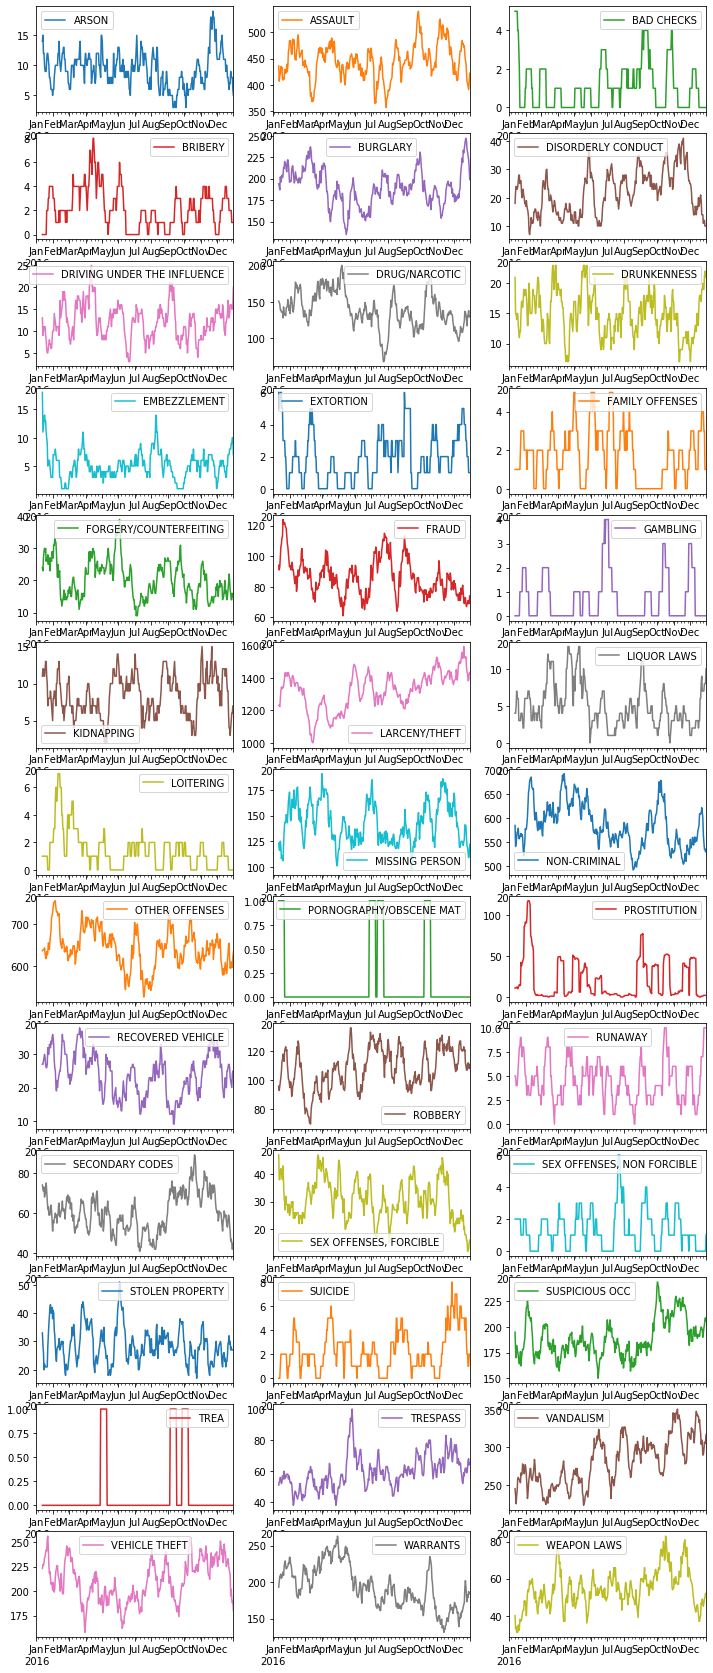

In [20]:
plot=crimes_count_date.rolling(12).sum().plot(figsize=(12,30),
                                              subplots=True,layout=(-1,3),
                                              sharex=False,sharey=False)
# does not show graphs for categories having null values

In [21]:
df["category"].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

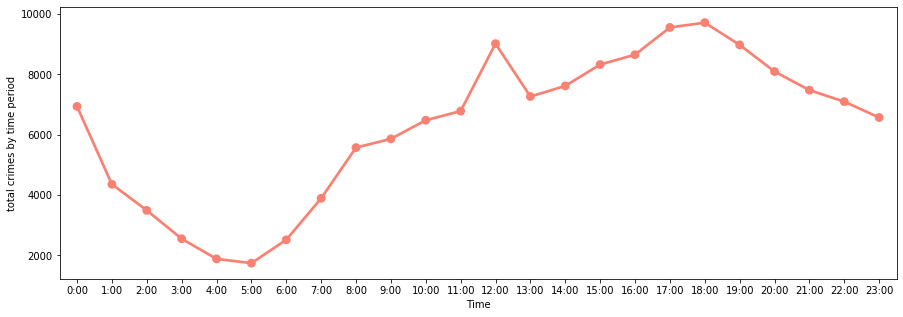

In [22]:
# monthly and hourly trend analysis
#crimes_by_time = df.copy()

crimes_by_time=df['category']
crimes_by_time=df.groupby('time_hour').size().reset_index(name="no of crimes")
crimes_by_time['hours']=crimes_by_time["time_hour"].apply(lambda x:str(x)+":00")

fig=plt.figure(figsize=(15,5))
sns.pointplot(data=crimes_by_time,x="hours",y="no of crimes",color="salmon")

plt.xlabel("Time")
plt.ylabel("total crimes by time period")
plt.show()


# this shows that there is decrease in crimes after midnight and early in the morning its minimum 
# and towards afternoon it again start rising and reaches to the peak and starts decreasing toward the night
# hence most of the crimes happen during daytime
# suggests that police and citizens need to be aware during daytime

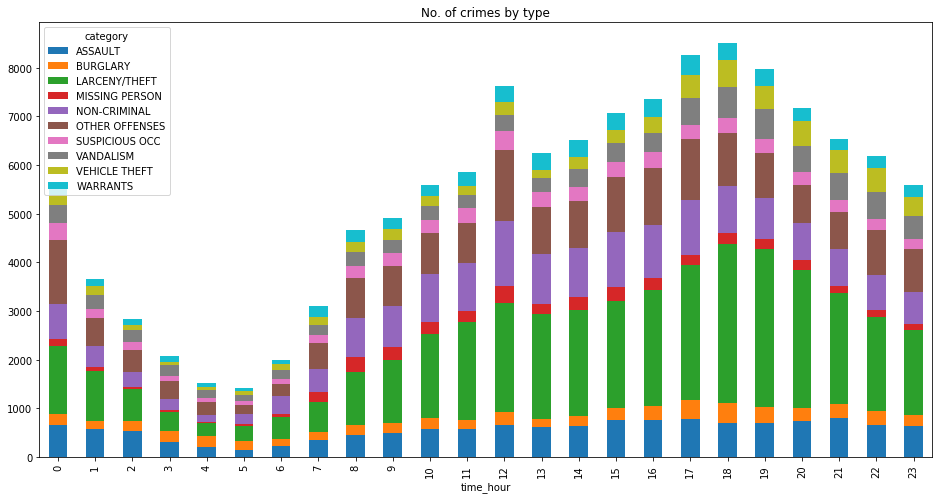

In [23]:
crimes_by_type=df.copy()

category_types=["LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","VANDALISM","VEHICLE THEFT","WARRANTS","BURGLARY",
            "SUSPICIOUS OCC","MISSING PERSON"]


crimes_by_type=crimes_by_type[crimes_by_type["category"].isin(category_types)]

crimes_by_type=crimes_by_type.groupby(["time_hour","category"]).size().reset_index(name="No of crimes")

# format hour data
crimes_by_type["hours"]=crimes_by_type["time_hour"].apply(lambda x:str(x)+':00')

# create crime type pivot table
crimes_by_type_pivot=pd.pivot_table(crimes_by_type,index=["time_hour"],
                                   columns=["category"],values="No of crimes",aggfunc=np.sum)

# stacked bar plot
crimes_by_type_pivot.plot(kind="bar",stacked=True,figsize=(16,8),
                         title="No. of crimes by type")


# taking only top crimes into account and plotting the bar stacked plot which is clearly showing the no of crimes at 
# different hour of the day 
# and among all of them larceny/theft is still the most frequent one
# moroever in the morning crime rate is less and its at peak at 6 in the evening and then starts decreasing

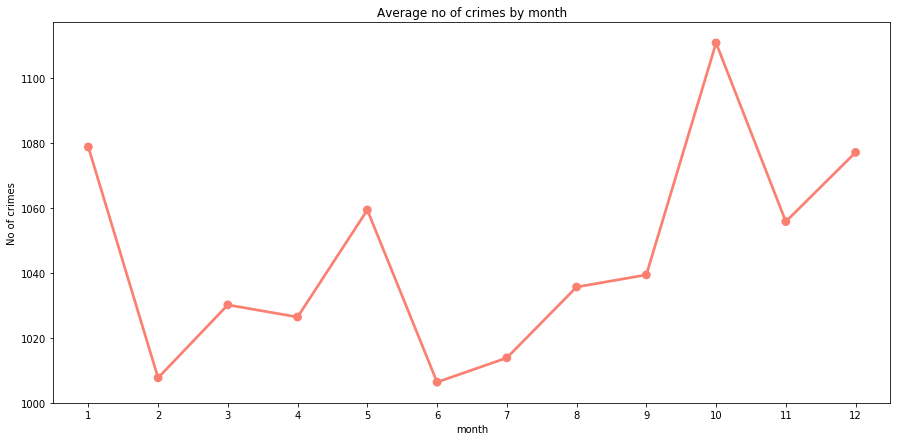

In [24]:
# analysing trend for average monthly crimes

crimes_by_month=df.copy()
crimes_by_month=df["category"]
crimes_by_month=df.groupby('month').size().reset_index(name="No of crimes")

# to get average crime count, divide by 5 for 5 years
crimes_by_month['month (average)']=crimes_by_month["No of crimes"].apply(lambda x: x/12)

# plot
fig=plt.figure(figsize=(15,7))
sns.pointplot(data=crimes_by_month,x="month",y="month (average)",color="salmon")

# labels
plt.xlabel("month")
plt.ylabel("No of crimes")
plt.title("Average no of crimes by month")
plt.show()

# again average no of crimes are highest in october
# this shows that crimes dips in february and spikes in october
# this can be very useful info for travellers and for police department for which months there should be high alert

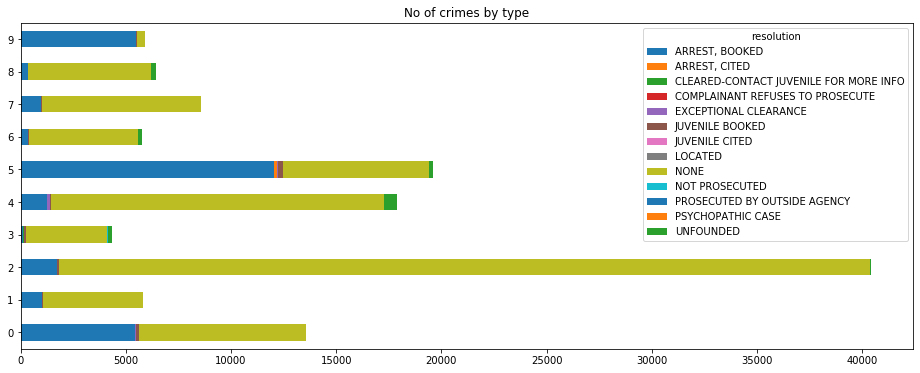

In [25]:
# ratio of crime arrest based on crime types

arrest_action=df.copy()

category_types=["LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","VANDALISM","VEHICLE THEFT","WARRANTS","BURGLARY",
            "SUSPICIOUS OCC","MISSING PERSON"]

arrest_action=arrest_action.groupby(["category","resolution"]).size().reset_index(name="No of crimes")

# filtering top10
arrest_action=arrest_action[arrest_action["category"].isin(category_types)]


# create pivot table
arrest_action_pivot=pd.pivot_table(arrest_action,index=["category"],
                                     columns=["resolution"],values="No of crimes",aggfunc=np.sum)
arrest_action_pivot=arrest_action_pivot.reset_index()

arrest_action_pivot.head()

arrest_action_pivot.plot(kind="barh",stacked=True,figsize=(16,6),title="No of crimes by type")

# highest no of arrest, booked happened in case of vandalism ie index no 5